## Prediction using Unsupervised ML

**Aim :-** From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Data Source :- https://bit.ly/3kXTdox

#### Author :- Himani Joshi

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('/Users/himani/Downloads/The Sparks Foundation Internship/Tasks/The Sparks Foundation/Task 2/Iris.csv')
del df['Id']
print("Read data successfully")

Read data successfully


In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Viewing last 5 rows of the dataset
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Checking the datatypes
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# Finding unique count of the features
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [8]:
# Finding count of species
pd.value_counts(df.Species)

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Analysing the correlation
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**K Means Clustering**

In [11]:
## Finding out the optimal number of clusters
X = df.iloc[:,0:4].values
wcss = []
from sklearn.cluster import KMeans
for i in range(1,11):
    kmeans_init = KMeans(n_clusters = i, init='k-means++')
    kmeans_init.fit(X)
    wcss.append(kmeans_init.inertia_)   
##kmeans inertia_ attribute is:  Sum of squared distances of samples to their closest cluster center.

**Using elbow method to determine the optimal number of clusters**

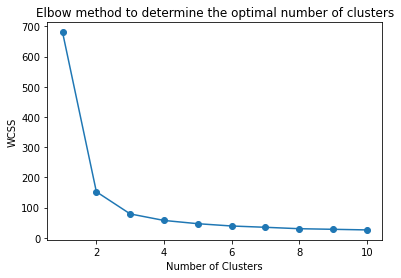

In [12]:
## Plotting the elbow method graph 
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow method to determine the optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**The point at which there is an abrupt decrease is the optimal number of clusters.**

**Therefore the optimal number of clusters are 3.**

In [13]:
## Implementing K-Means
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
cluster = kmeans.fit_predict(X)

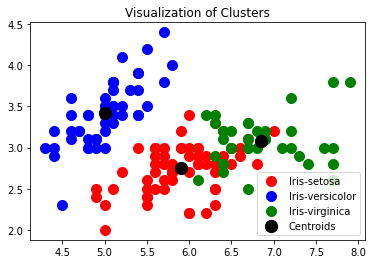

In [14]:
## Plotting the centroids of the clusters 
plt.scatter(X[cluster ==0, 0], X[cluster ==0, 1], s=100, c='red', label ='Iris-setosa')
plt.scatter(X[cluster ==1, 0], X[cluster ==1, 1], s=100, c='blue', label ='Iris-versicolor')
plt.scatter(X[cluster ==2, 0], X[cluster ==2, 1], s=100, c='green', label ='Iris-virginica')
plt.legend()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', label = 'Centroids')
plt.title('Visualization of Clusters', fontsize = 12)
plt.legend()
plt.show()